<a href="https://colab.research.google.com/github/ismailmetinipek/HW1/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
zip_path = "/content/wine.zip"
extract_path = "/content/wine_data"

In [3]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [4]:
data_path = extract_path + "/wine.data"


In [5]:
column_names = ["Class", "Alcohol", "Malic_acid", "Ash", "Alcalinity_of_ash",
                "Magnesium", "Total_phenols", "Flavanoids", "Nonflavanoid_phenols",
                "Proanthocyanins", "Color_intensity", "Hue", "OD280/OD315", "Proline"]

df = pd.read_csv(data_path, names=column_names)

print(df.head())

   Class  Alcohol  Malic_acid   Ash  Alcalinity_of_ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_intensity   Hue  OD280/OD315  Proline  
0             5.64  1.04         3.92     1065  
1             4.38  1.05         3.40     1050  
2          

Class
2    71
1    59
3    48
Name: count, dtype: int64


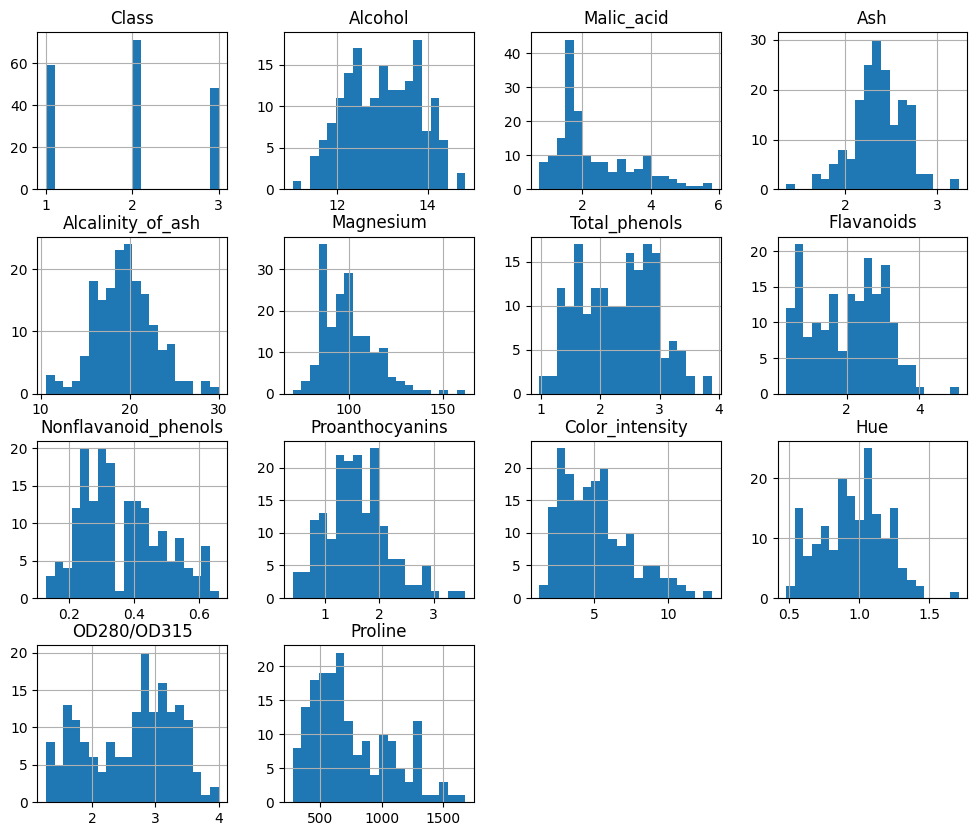

In [6]:
print(df["Class"].value_counts())
df.hist(figsize=(12, 10), bins=20)
plt.show()

<ipython-input-7-8046cc0daa6d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Class"], palette="viridis")


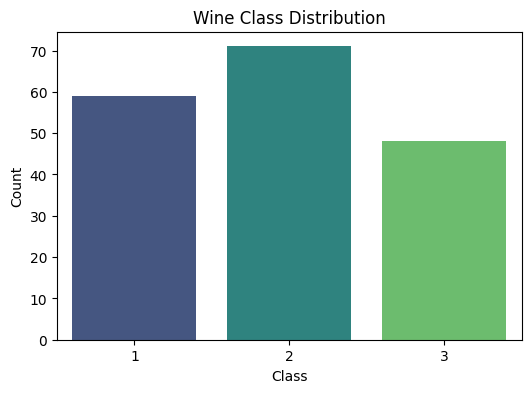

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["Class"], palette="viridis")
plt.title("Wine Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

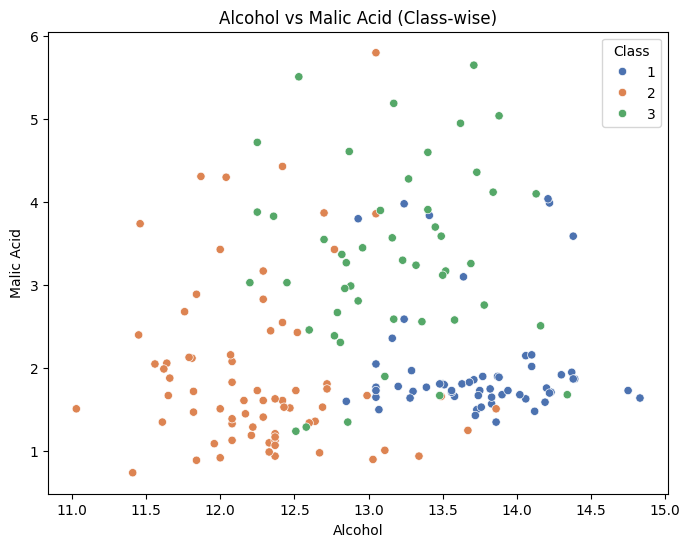

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Alcohol"], y=df["Malic_acid"], hue=df["Class"], palette="deep")
plt.title("Alcohol vs Malic Acid (Class-wise)")
plt.xlabel("Alcohol")
plt.ylabel("Malic Acid")
plt.legend(title="Class")
plt.show()


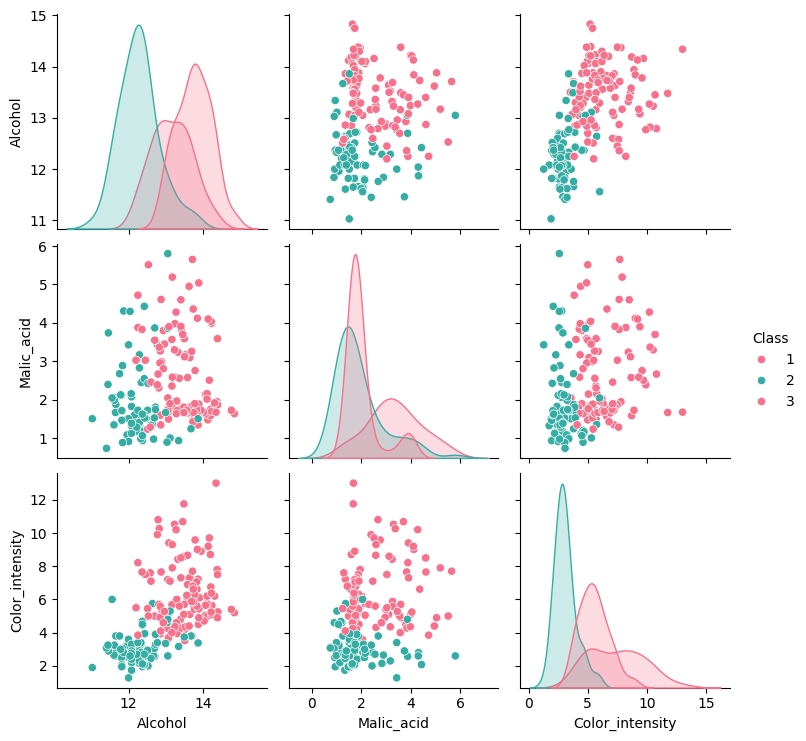

In [10]:
sns.pairplot(df, vars=["Alcohol", "Malic_acid", "Color_intensity"], hue="Class", palette="husl")
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv(data_path, names=column_names)

print("Missing Values:\n", df.isnull().sum())

X = df.drop(columns=["Class"])
y = df["Class"]

# Min-Max Normalization
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:].astype(float))

df_normalized.head()

X = df_normalized.iloc[:, 1:]
y = df_normalized.iloc[:, 0]

#Dividng the data as %80 training, %20 test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Missing Values:
 Class                   0
Alcohol                 0
Malic_acid              0
Ash                     0
Alcalinity_of_ash       0
Magnesium               0
Total_phenols           0
Flavanoids              0
Nonflavanoid_phenols    0
Proanthocyanins         0
Color_intensity         0
Hue                     0
OD280/OD315             0
Proline                 0
dtype: int64
Training set size: (142, 13)
Testing set size: (36, 13)


<ipython-input-11-51f67e70de4d>:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.61956522 0.32608696 0.33695652 0.4673913  0.52173913 0.45652174
 0.2826087  0.55434783 0.29347826 0.30434783 0.38043478 0.27173913
 0.20652174 0.22826087 0.34782609 0.45652174 0.54347826 0.48913043
 0.41304348 0.5        0.60869565 0.34782609 0.33695652 0.27173913
 0.2826087  0.58695652 0.25       0.26086957 0.40217391 0.2826087
 0.33695652 0.39130435 0.36956522 0.67391304 0.43478261 0.32608696
 0.43478261 0.30434783 0.30434783 0.63043478 0.51086957 0.2173913
 0.33695652 0.35869565 0.40217391 0.44565217 0.34782609 0.33695652
 0.35869565 0.41304348 0.23913043 0.26086957 0.44565217 0.48913043
 0.52173913 0.5        0.52173913 0.34782609 0.41304348 0.19565217
 0.33695652 0.32608696 0.26086957 0.18478261 0.36956522 0.30434783
 0.08695652 0.08695652 0.43478261 0.88043478 0.35869565 0.17391304
 0.18478261 0.75       0.33695652 0.29347826

K=1, Distance=euclidean, Accuracy=0.9722


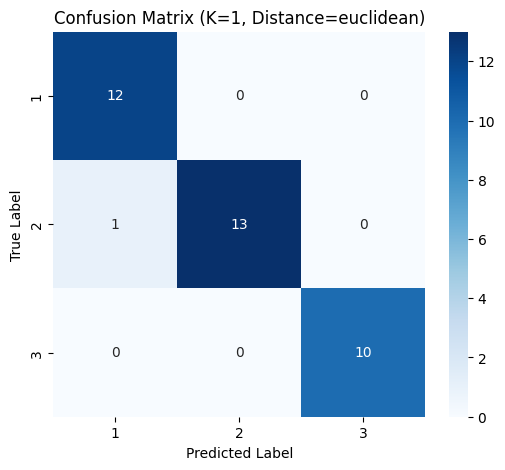


Classification Report:
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

K=3, Distance=euclidean, Accuracy=0.9722


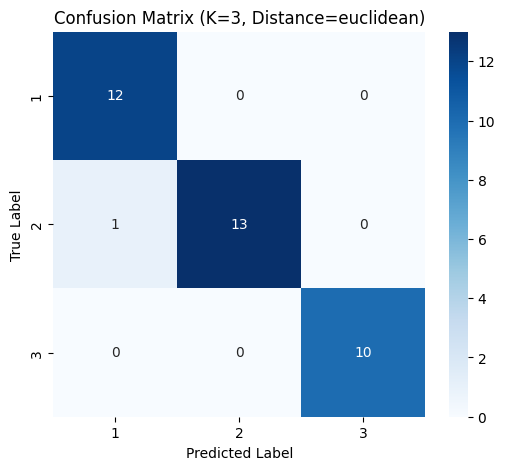


Classification Report:
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

K=5, Distance=euclidean, Accuracy=1.0000


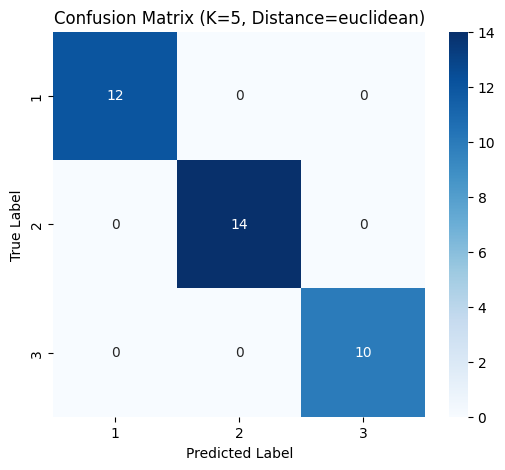


Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

K=7, Distance=euclidean, Accuracy=1.0000


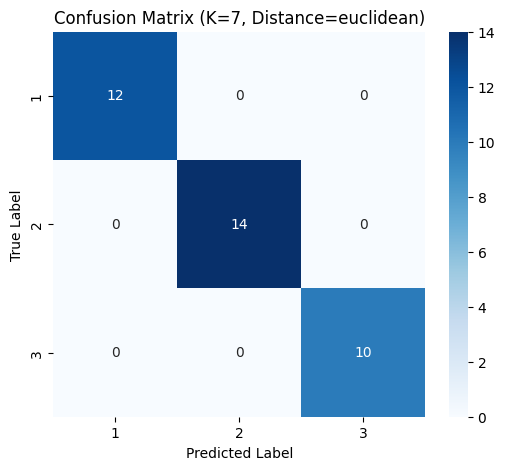


Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

K=9, Distance=euclidean, Accuracy=0.9722


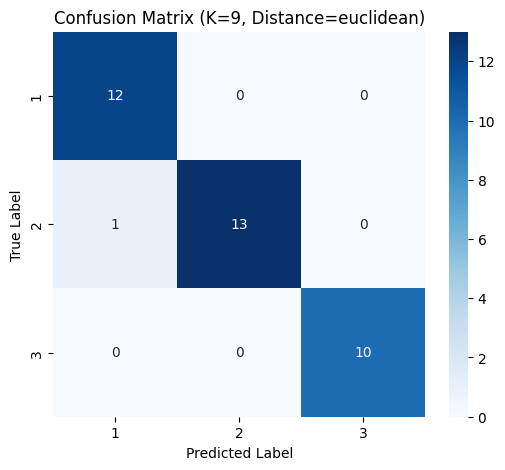


Classification Report:
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

K=1, Distance=manhattan, Accuracy=0.9444


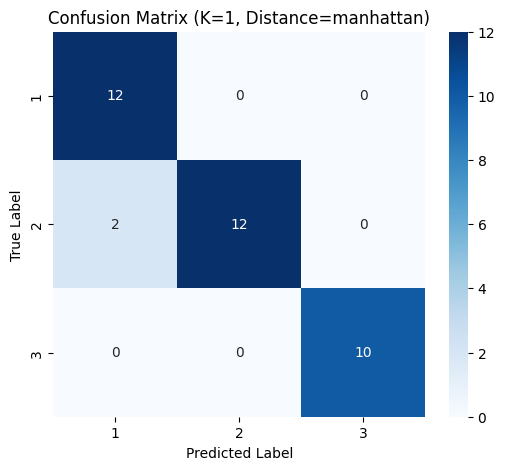


Classification Report:
              precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           2       1.00      0.86      0.92        14
           3       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36

K=3, Distance=manhattan, Accuracy=0.9722


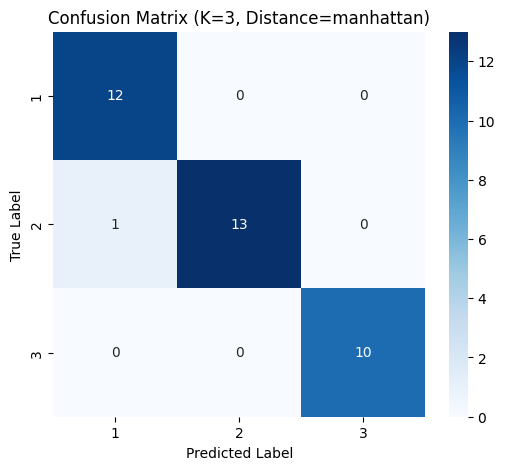


Classification Report:
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

K=5, Distance=manhattan, Accuracy=0.9722


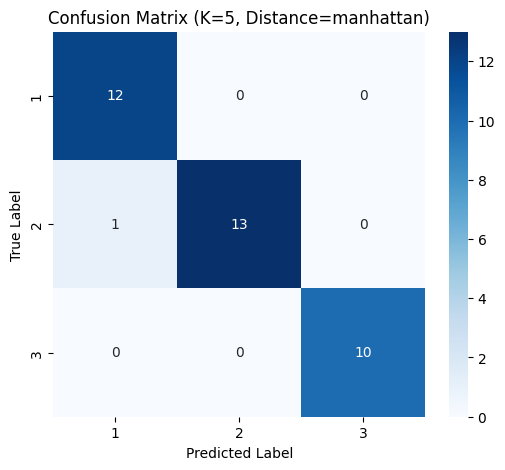


Classification Report:
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

K=7, Distance=manhattan, Accuracy=1.0000


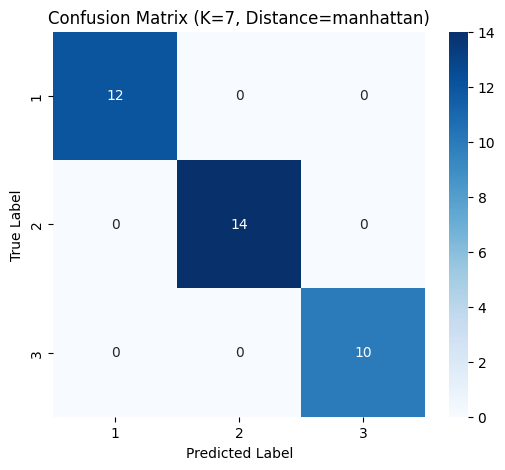


Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

K=9, Distance=manhattan, Accuracy=1.0000


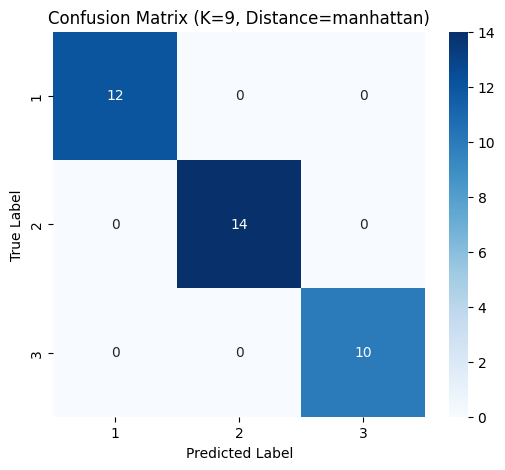


Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



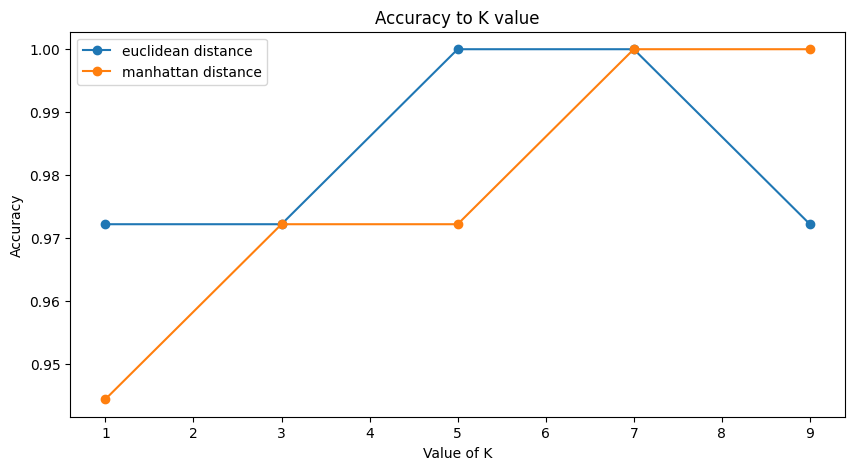

In [12]:
import numpy as np
from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#k-NN Algorithm
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

class KNNClassifier:
    def __init__(self, k=3, distance_metric="euclidean"):
        self.k = k
        self.distance_metric = distance_metric

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        y_pred = [self._predict(x) for x in X_test]
        return np.array(y_pred)

    def _predict(self, x):

        distances = []
        for i in range(len(self.X_train)):
            if self.distance_metric == "euclidean":
                dist = euclidean_distance(x, self.X_train[i])
            elif self.distance_metric == "manhattan":
                dist = manhattan_distance(x, self.X_train[i])
            distances.append((dist, self.y_train.iloc[i]))

        distances = sorted(distances)[:self.k]
        k_neighbors = [label for _, label in distances]

        most_common = Counter(k_neighbors).most_common(1)[0][0]
        return most_common

K_values = [1, 3, 5, 7, 9]
distance_metrics = ["euclidean", "manhattan"]
results = {}

for metric in distance_metrics:
    accuracy_scores = []

    for k in K_values:
        knn = KNNClassifier(k=k, distance_metric=metric)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        accuracy_scores.append(acc)
        print(f"K={k}, Distance={metric}, Accuracy={acc:.4f}")

        cm = confusion_matrix(y_test, y_pred)

        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.title(f"Confusion Matrix (K={k}, Distance={metric})")
        plt.show()

        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

    results[metric] = accuracy_scores

plt.figure(figsize=(10, 5))
for metric in distance_metrics:
    plt.plot(K_values, results[metric], marker='o', label=f"{metric} distance")

plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.title("Accuracy to K value")
plt.legend()
plt.show()
